Iterative Fibonacci: 55
Memoization Fibonacci: 55
Numpy Fibonacci: 55
SymPy Fibonacci: 55
Fibonacci List: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
Fibonacci via Generator: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
Matrix Fibonacci: 55
Fibonacci Modulo 10: 5


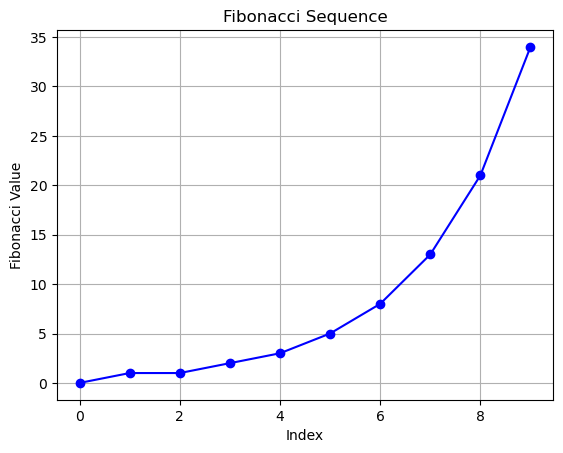

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
from sympy import fibonacci

def fibonacci_iterative(n):
    """Computes the Fibonacci sequence iteratively."""
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

@lru_cache(maxsize=None)
def fibonacci_memoization(n):
    """Computes Fibonacci using memoization."""
    if n < 2:
        return n
    return fibonacci_memoization(n - 1) + fibonacci_memoization(n - 2)

def fibonacci_numpy(n):
    """Computes Fibonacci using numpy."""
    sqrt_5 = np.sqrt(5)
    phi = (1 + sqrt_5) / 2
    return int((phi**n - (-1/phi)**n) / sqrt_5)

def fibonacci_sympy(n):
    """Uses SymPy to compute Fibonacci."""
    return fibonacci(n)

def fibonacci_list(n):
    """Generates the Fibonacci sequence as a list."""
    seq = [0, 1]
    for _ in range(2, n):
        seq.append(seq[-1] + seq[-2])
    return seq[:n]

def fibonacci_generator(n):
    """Uses a generator to compute Fibonacci."""
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

def fibonacci_matrix(n):
    """Uses matrix exponentiation to compute Fibonacci."""
    def matrix_mult(A, B):
        return [[A[0][0] * B[0][0] + A[0][1] * B[1][0], A[0][0] * B[0][1] + A[0][1] * B[1][1]],
                [A[1][0] * B[0][0] + A[1][1] * B[1][0], A[1][0] * B[0][1] + A[1][1] * B[1][1]]]
    
    def matrix_pow(M, p):
        result = [[1, 0], [0, 1]]
        base = M
        while p:
            if p % 2:
                result = matrix_mult(result, base)
            base = matrix_mult(base, base)
            p //= 2
        return result
    
    return matrix_pow([[1, 1], [1, 0]], n)[0][1]

def fibonacci_modulo(n, mod):
    """Computes Fibonacci modulo a given number."""
    a, b = 0, 1
    for _ in range(n):
        a, b = b % mod, (a + b) % mod
    return a

def plot_fibonacci(n):
    """Plots the first N terms of the Fibonacci sequence."""
    seq = fibonacci_list(n)
    plt.plot(seq, marker='o', linestyle='-', color='b')
    plt.xlabel('Index')
    plt.ylabel('Fibonacci Value')
    plt.title('Fibonacci Sequence')
    plt.grid()
    plt.show()

# Example usage
size = 10
print("Iterative Fibonacci:", fibonacci_iterative(size))
print("Memoization Fibonacci:", fibonacci_memoization(size))
print("Numpy Fibonacci:", fibonacci_numpy(size))
print("SymPy Fibonacci:", fibonacci_sympy(size))
print("Fibonacci List:", fibonacci_list(size))
print("Fibonacci via Generator:", list(fibonacci_generator(size)))
print("Matrix Fibonacci:", fibonacci_matrix(size))
print("Fibonacci Modulo 10:", fibonacci_modulo(size, 10))
plot_fibonacci(size)
